In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [8]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [9]:
' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[0]

3

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [25]:
y_val  = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                   batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 31ms/step - loss: 2.7739 - accuracy: 0.5093 - val_loss: 1.8363 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.4837 - accuracy: 0.6957 - val_loss: 1.3463 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0808 - accuracy: 0.7670 - val_loss: 1.1505 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8411 - accuracy: 0.8255 - val_loss: 1.0402 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6641 - accuracy: 0.8654 - val_loss: 0.9749 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5328 - accuracy: 0.8884 - val_loss: 0.9240 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4262 - accuracy: 0.9149 - val_loss: 0.8988 - val_accuracy: 0.8140
Epoch 8/20
16

In [27]:
import matplotlib.pyplot as plt

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [29]:
epochs = range(1,len(loss)+1)

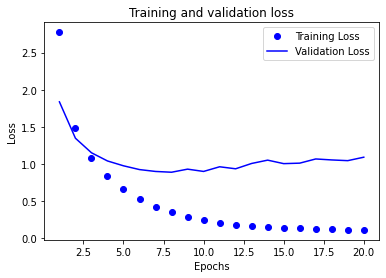

In [30]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

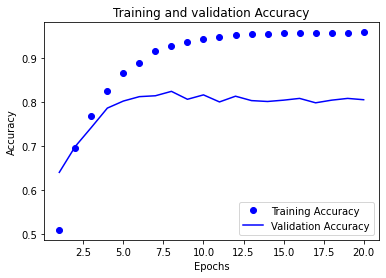

In [31]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [33]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
model.fit(partial_x_train, partial_y_train, epochs=9,
         batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 29ms/step - loss: 2.5383 - accuracy: 0.5487 - val_loss: 1.6468 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 0s 22ms/step - loss: 1.3490 - accuracy: 0.7152 - val_loss: 1.2537 - val_accuracy: 0.7360
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.0024 - accuracy: 0.7881 - val_loss: 1.0838 - val_accuracy: 0.7720
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.7888 - accuracy: 0.8345 - val_loss: 0.9942 - val_accuracy: 0.7940
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.6286 - accuracy: 0.8683 - val_loss: 0.9220 - val_accuracy: 0.8110
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5019 - accuracy: 0.8934 - val_loss: 0.8983 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 26ms/step - loss: 0.4006 - accuracy: 0.9152 - val_loss: 0.9339 - val_accuracy: 0.8000
Epoch 8/9
16/16 [===

In [35]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.0136 - accuracy: 0.7774


In [36]:
results

[1.013587236404419, 0.7773820161819458]

In [37]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [38]:
predictions[0].shape

(46,)

In [40]:
np.argmax(predictions[0])

3